In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Uploading

In [16]:
df = pd.read_csv("C:/Users/HP/Downloads/supply_chain_data.csv")
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [3]:
df.shape

(100, 24)

# Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [5]:
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [6]:
df.duplicated().sum()

0

# Data Visualization

In [7]:
nc = df.select_dtypes(include=['int64','float64']).columns.tolist()

cc = df.select_dtypes(['object']).columns.tolist()

print('numeric_columns',nc)
print()
print('category_columns',cc)

numeric_columns ['Price', 'Availability', 'Number of products sold', 'Revenue generated', 'Stock levels', 'Lead times', 'Order quantities', 'Shipping times', 'Shipping costs', 'Lead time', 'Production volumes', 'Manufacturing lead time', 'Manufacturing costs', 'Defect rates', 'Costs']

category_columns ['Product type', 'SKU', 'Customer demographics', 'Shipping carriers', 'Supplier name', 'Location', 'Inspection results', 'Transportation modes', 'Routes']


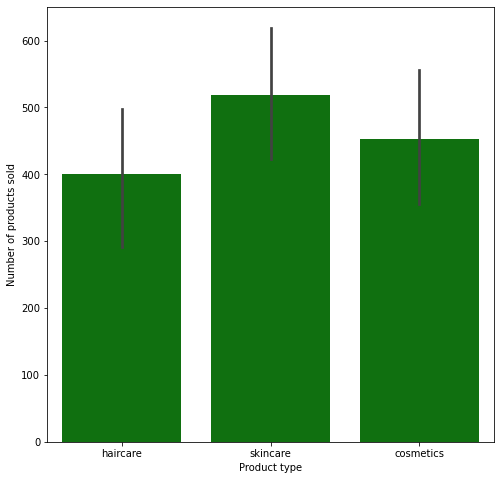

In [8]:
plt.figure(figsize=(8,8))
sns.barplot(y= df['Number of products sold'], x= df['Product type'] ,color='g')
plt.show()

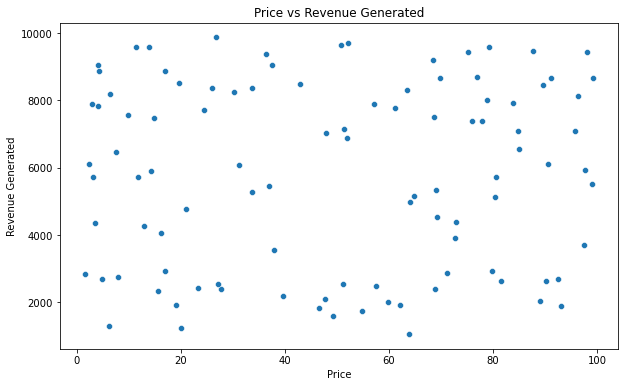

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Price', y='Revenue generated')
plt.xlabel('Price')
plt.ylabel('Revenue Generated')
plt.title('Price vs Revenue Generated')
plt.show()

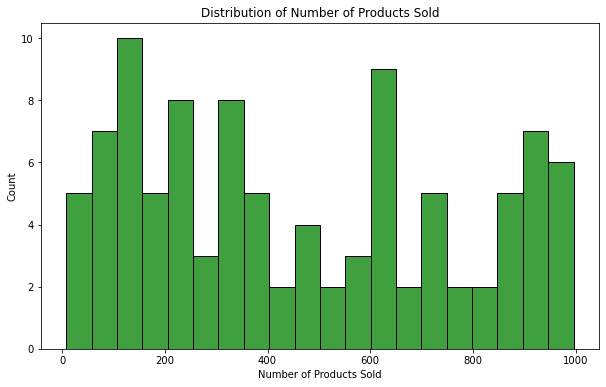

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Number of products sold', bins=20,color='g')
plt.xlabel('Number of Products Sold')
plt.ylabel('Count')
plt.title('Distribution of Number of Products Sold')
plt.show()

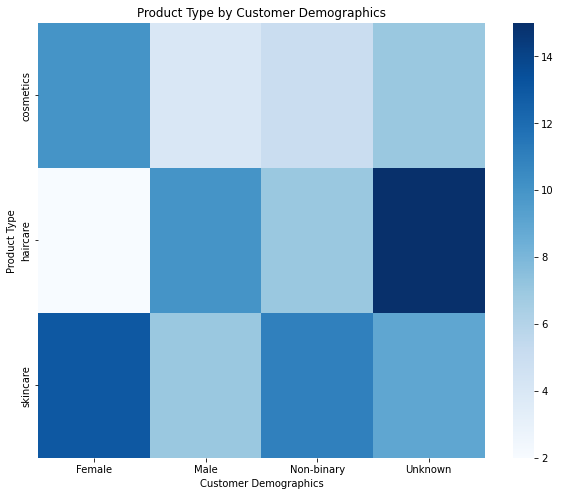

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(pd.crosstab(df['Product type'], df['Customer demographics']), cmap='Blues')
plt.xlabel('Customer Demographics')
plt.ylabel('Product Type')
plt.title('Product Type by Customer Demographics')
plt.show()

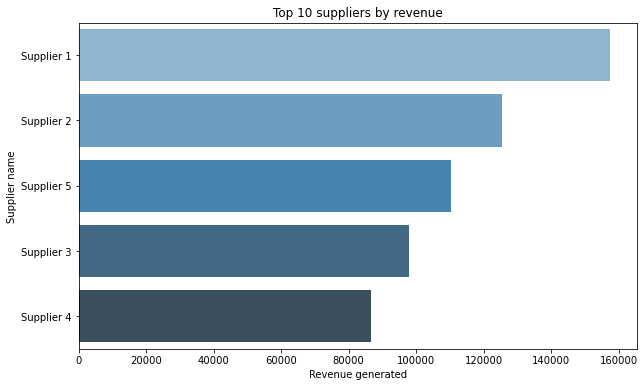

In [13]:
plt.figure(figsize=(10,6))
top_suppliers = df.groupby('Supplier name')['Revenue generated'].sum().nlargest(10)
sns.barplot(x=top_suppliers.values, y=top_suppliers.index, palette='Blues_d')
plt.xlabel('Revenue generated')
plt.ylabel('Supplier name')
plt.title('Top 5 suppliers by revenue')
plt.show()

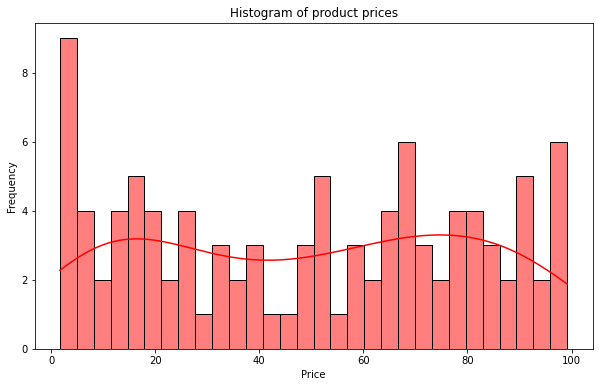

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Price', kde=True, bins=30,color='r')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of product prices')
plt.show()

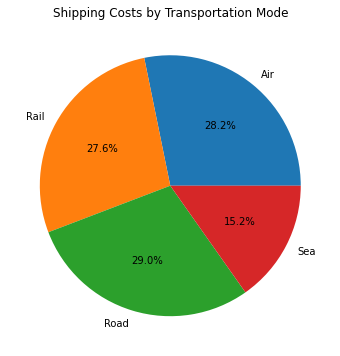

In [15]:
plt.figure(figsize=(10,6))
transportation_costs = df.groupby('Transportation modes')['Shipping costs'].sum()
plt.pie(transportation_costs, labels=transportation_costs.index, autopct='%1.1f%%')
plt.title('Shipping Costs by Transportation Mode')
plt.show()